# Nissen et al., 2023: Severe 21st-century OA in Antarctic MPAs
#
# Fig. 1: plot avg pH in top 200m and in the bottom layer
# (this script also produces the corresponding plots for omega aragonite and calcite -> not shown in paper)
#
# this script requires post-processed model output

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
import pandas as pd

In [2]:
#---
# general info
#---

# where are the data? (names of *nc files are hard-coded in 'get_data()' function below)
path_to_data = '/global/homes/c/cnissen/ARCHIVE_Nissen2023_NatureComms_OA_in_MPAs/nc_files/'
#'/pscratch/sd/c/cnissen/carbonate_chemistry_3D_v2/regional/' 

savepath    = '/global/cfs/cdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/Fig1_BarPlots/'
if not os.path.exists(savepath):
    print('Created '+savepath)
    os.makedirs(savepath)

savepath2    = '/global/cfs/cdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/Fig1_BarPlots/eps/'
if not os.path.exists(savepath2):
    print('Created '+savepath2)
    os.makedirs(savepath2)
    

In [17]:
#---
# function to load variables
#---

def get_data(vari1,vari2,path_to_data):
    #
    # NOTE: Regional averages for the Antarctic Peninsula MPA (shelf vs. open ocean) were stored 
    # in a separate file from the other regions; combine the data to a single file here
    #
    
    print ('Load ',vari1,vari2)
    
    file1 = 'Carbonate_chemistry_regional_simAssp585_1990_2100_v3.nc'
    file2 = 'Carbonate_chemistry_regional_simAssp370_2015_2100_v3.nc'
    file3 = 'Carbonate_chemistry_regional_simAssp245_2015_2100_v3.nc'
    file4 = 'Carbonate_chemistry_regional_simAssp126_2015_2100_v3.nc'
    file5 = 'Carbonate_chemistry_regional_simAssp585_1990_2100_v3.nc' 

    ff1 = Dataset(path_to_data + file1)
    ff2 = Dataset(path_to_data + file2)
    ff3 = Dataset(path_to_data + file3)
    ff4 = Dataset(path_to_data + file4)
    ff5 = Dataset(path_to_data + file5)
   
    dataA_1 = ff1.variables[vari1][:,:,:] # month x year x subregion
    dataA_2 = ff2.variables[vari1][:,:,:]
    dataA_3 = ff3.variables[vari1][:,:,:]
    dataA_4 = ff4.variables[vari1][:,:,:]
    dataA_5 = ff5.variables[vari1][:,:,:]

    dataC_1 = ff1.variables[vari2][:,:,:] # month x year x subregion
    dataC_2 = ff2.variables[vari2][:,:,:]
    dataC_3 = ff3.variables[vari2][:,:,:]
    dataC_4 = ff4.variables[vari2][:,:,:]
    dataC_5 = ff5.variables[vari2][:,:,:]

    # for ssp370, ssp245 & ssp126, add historical years to beginning of array 
    # (for these scenarios, data were only post-processed and stored in file from 2015 to 2100)
    fill_array = np.nan*np.ones([dataA_1.shape[0],25,dataA_1.shape[2]])
    dataA_2 = np.concatenate((fill_array,dataA_2),axis=1)
    dataA_3 = np.concatenate((fill_array,dataA_3),axis=1)
    dataA_4 = np.concatenate((fill_array,dataA_4),axis=1)
    dataC_2 = np.concatenate((fill_array,dataC_2),axis=1)
    dataC_3 = np.concatenate((fill_array,dataC_3),axis=1)
    dataC_4 = np.concatenate((fill_array,dataC_4),axis=1)

    ff1.close()
    ff2.close()
    ff3.close()
    ff4.close()
    ff5.close()
    
    data_all_Arag_1 = np.stack((dataA_1,dataA_2,dataA_3,dataA_4,dataA_5),axis=3)
    data_all_Calc_1 = np.stack((dataC_1,dataC_2,dataC_3,dataC_4,dataC_5),axis=3)
    #print ('data_all_Arag.shape:',data_all_Arag_1.shape)
    
    #---
    # load Antarctic Peninsula separately
    #---
    file1 = 'Carbonate_chemistry_regional_simAssp585_1990_2100_v4_AntarcticPeninsula_only.nc'
    file2 = 'Carbonate_chemistry_regional_simAssp370_2015_2100_v4_AntarcticPeninsula_only.nc'
    file3 = 'Carbonate_chemistry_regional_simAssp245_2015_2100_v4_AntarcticPeninsula_only.nc'
    file4 = 'Carbonate_chemistry_regional_simAssp126_2015_2100_v4_AntarcticPeninsula_only.nc'
    file5 = 'Carbonate_chemistry_regional_simAssp585_1990_2100_v4_AntarcticPeninsula_only.nc' #'Carbonate_chemistry_regional_simB_1990_2100_v3.nc'

    ff1 = Dataset(path_to_data + file1)
    ff2 = Dataset(path_to_data + file2)
    ff3 = Dataset(path_to_data + file3)
    ff4 = Dataset(path_to_data + file4)
    ff5 = Dataset(path_to_data + file5)
   
    dataA_1 = ff1.variables[vari1][:,:,:] # month x year x subregion
    dataA_2 = ff2.variables[vari1][:,:,:]
    dataA_3 = ff3.variables[vari1][:,:,:]
    dataA_4 = ff4.variables[vari1][:,:,:]
    dataA_5 = ff5.variables[vari1][:,:,:]

    dataC_1 = ff1.variables[vari2][:,:,:] # month x year x subregion
    dataC_2 = ff2.variables[vari2][:,:,:]
    dataC_3 = ff3.variables[vari2][:,:,:]
    dataC_4 = ff4.variables[vari2][:,:,:]
    dataC_5 = ff5.variables[vari2][:,:,:]

    # for ssp370, ssp245 & ssp126, add historical years to beginning of array 
    # (for these scenarios, data were only post-processed and stored in file from 2015 to 2100)
    fill_array = np.nan*np.ones([dataA_1.shape[0],25,dataA_1.shape[2]])
    dataA_2 = np.concatenate((fill_array,dataA_2),axis=1)
    dataA_3 = np.concatenate((fill_array,dataA_3),axis=1)
    dataA_4 = np.concatenate((fill_array,dataA_4),axis=1)
    dataC_2 = np.concatenate((fill_array,dataC_2),axis=1)
    dataC_3 = np.concatenate((fill_array,dataC_3),axis=1)
    dataC_4 = np.concatenate((fill_array,dataC_4),axis=1)

    ff1.close()
    ff2.close()
    ff3.close()
    ff4.close()
    ff5.close()
    
    data_all_Arag_2 = np.stack((dataA_1,dataA_2,dataA_3,dataA_4,dataA_5),axis=3)
    data_all_Calc_2 = np.stack((dataC_1,dataC_2,dataC_3,dataC_4,dataC_5),axis=3)
    # print ('data_all_Arag.shape:',data_all_Arag_2.shape)
    
    # stack both files to have all regions in a single file
    data_all_Arag = np.concatenate((data_all_Arag_1,data_all_Arag_2),axis=2)
    data_all_Calc = np.concatenate((data_all_Calc_1,data_all_Calc_2),axis=2)
    
    print ('data_all_Arag.shape (months x years x regions x simulations):',data_all_Arag.shape)
    
    return data_all_Arag,data_all_Calc


In [22]:
#-----
# COLOR SCHEME
#-----
cc1 = (52./255.,103./255.,92./255.) # pine
cc2 = (161./255.,190./255.,149./255.) # sage
cc3 = (45./255.,66./255.,98./255.) # indigo
cc4 = (248./255.,160./255.,85./255.) # Canteloupe
cc5 = (186./255.,168./255.,150./255.) # warm grey
cc6 = (0./255.,0./255.,0./255.) # black

# Ross: 
color_list1 = [(0./255.,59./255.,70./255.),(102./255.,165./255.,173./255.),(196./255.,223./255.,230./255.),\
                  (0.82,0.82,0.82)]
# eastAA: 
color_list2 = [(75./255.,116./255.,71./255.),(161./255.,190./255.,149./255.),(201./255.,209./255.,200./255.),\
                  (0.82,0.82,0.82)]
# Weddell: 
color_list3 = [(26./255.,64./255.,95./255.),(51./255.,123./255.,174./255.),(208./255.,225./255.,249./255.),\
                  (0.82,0.82,0.82)]
# Orkney: 
color_list4 = [(164./255.,56./255.,32./255.),(238./255.,105./255.,36./255.),(248./255.,160./255.,85./255.),\
                  (0.82,0.82,0.82)]
# WAP: 
color_list5 = [(80./255.,49./255.,47./255.),(186./255.,168./255.,150./255.),(230./255.,204./255.,181./255.),\
                  (0.82,0.82,0.82)]
# grey scale for areas that are not MPAs
color_list6 = [(0./255.,0./255.,0./255.),(75./255.,75./255.,75./255.),(150./255.,150./255.,150./255.),\
                  (0.82,0.82,0.82)]
  
color1 = (0.28,0.28,0.28) #'dimgrey'
    

Load  omegaA_avg_bottom pH_avg_bottom
data_all_Arag.shape (months x years x regions x simulations): (12, 111, 31, 5)
RossSea_MPA
RossSea_MPA_shelf


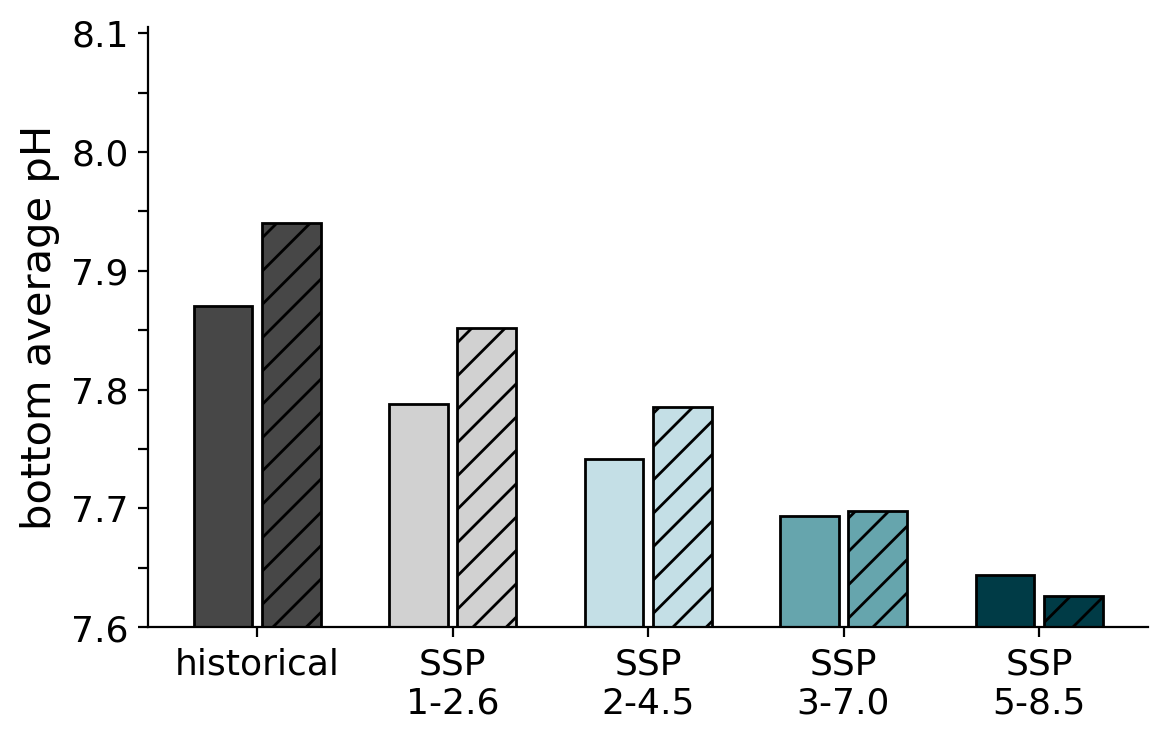

1990s (open ocean, shelf, difference): 7.870261263847351 7.939871867497762 -0.0696106036504105
2090s, ssp126 (open ocean, shelf, difference): 7.787985714276632 7.852119946479798 -0.06413423220316528
2090s, ssp245 (open ocean, shelf, difference): 7.741460975011191 7.785123773415883 -0.043662798404692005
2090s, ssp370 (open ocean, shelf, difference): 7.693285151322682 7.697776782512665 -0.004491631189982748
2090s, ssp585 (open ocean, shelf, difference): 7.644105458259583 7.626091206073761 0.018014252185821533
WeddellSea_MPA
WeddellSea_MPA_shelf


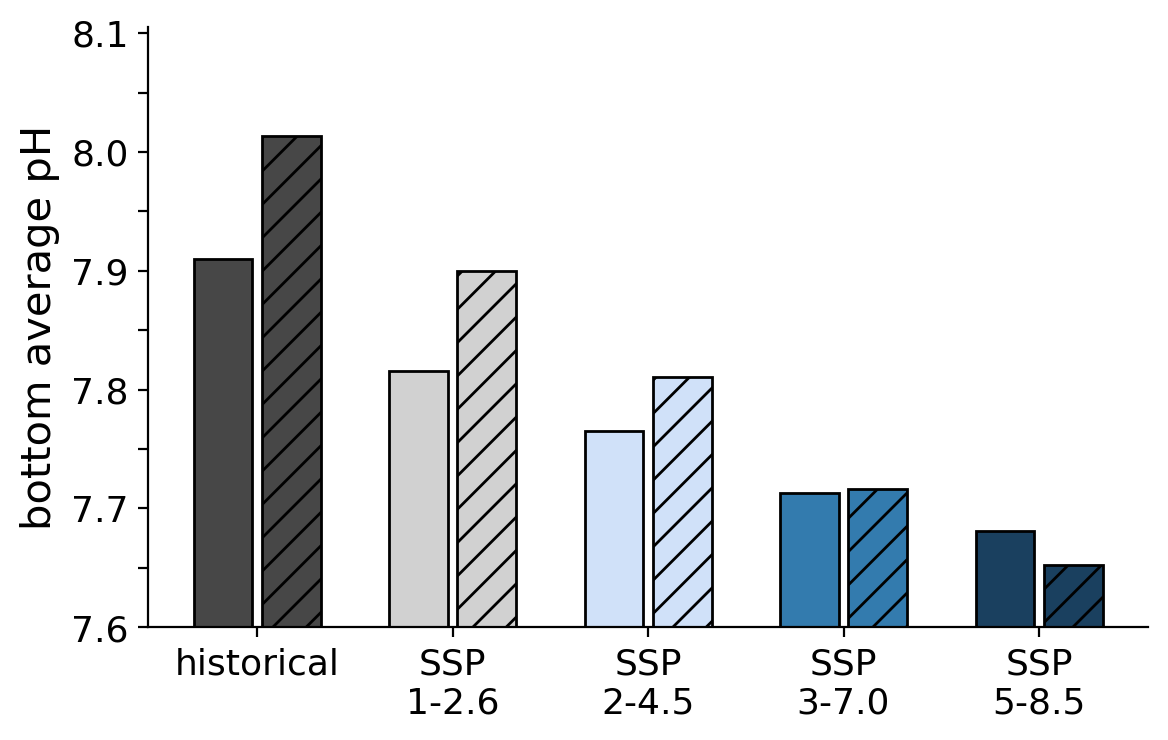

1990s (open ocean, shelf, difference): 7.909494443734486 8.01308490037918 -0.10359045664469413
2090s, ssp126 (open ocean, shelf, difference): 7.815683845678966 7.899453596274059 -0.08376975059509295
2090s, ssp245 (open ocean, shelf, difference): 7.765350592136383 7.810672533512116 -0.04532194137573242
2090s, ssp370 (open ocean, shelf, difference): 7.712574601173401 7.715909492969511 -0.003334891796110462
2090s, ssp585 (open ocean, shelf, difference): 7.680538292725882 7.651900498072306 0.028637794653575632
Orkney_MPA


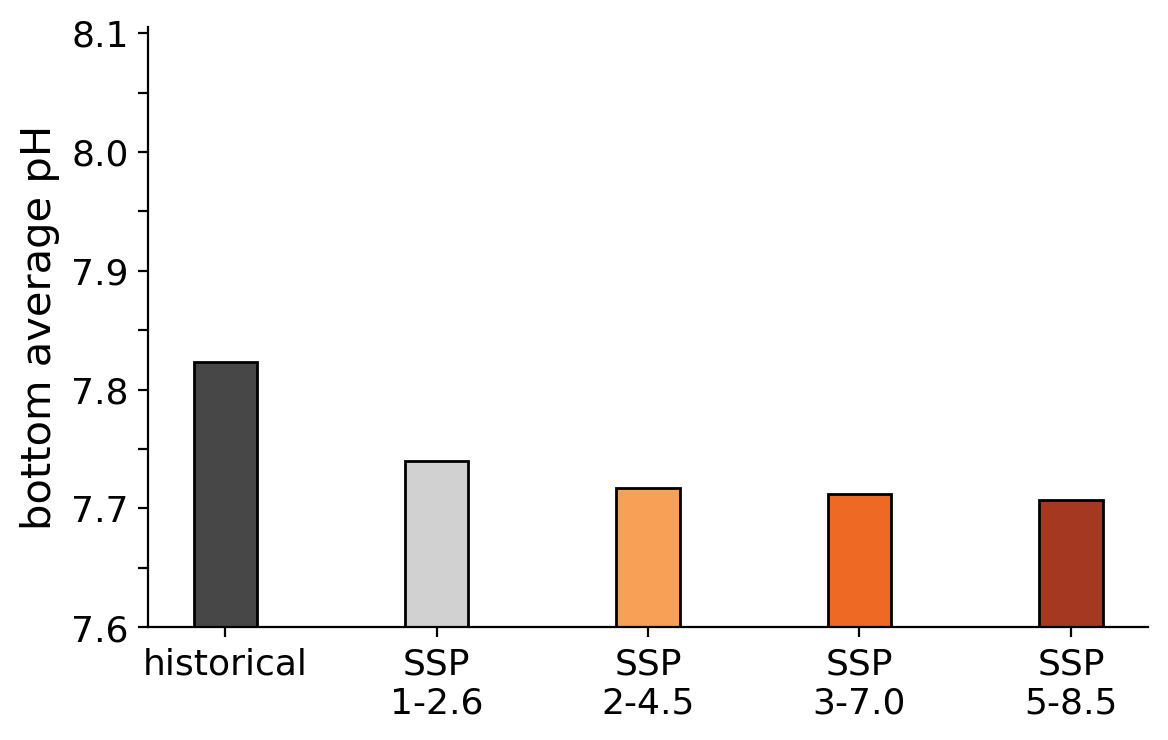

East_Antarctica_all_MPA
East_Antarctica_all_MPA_shelf


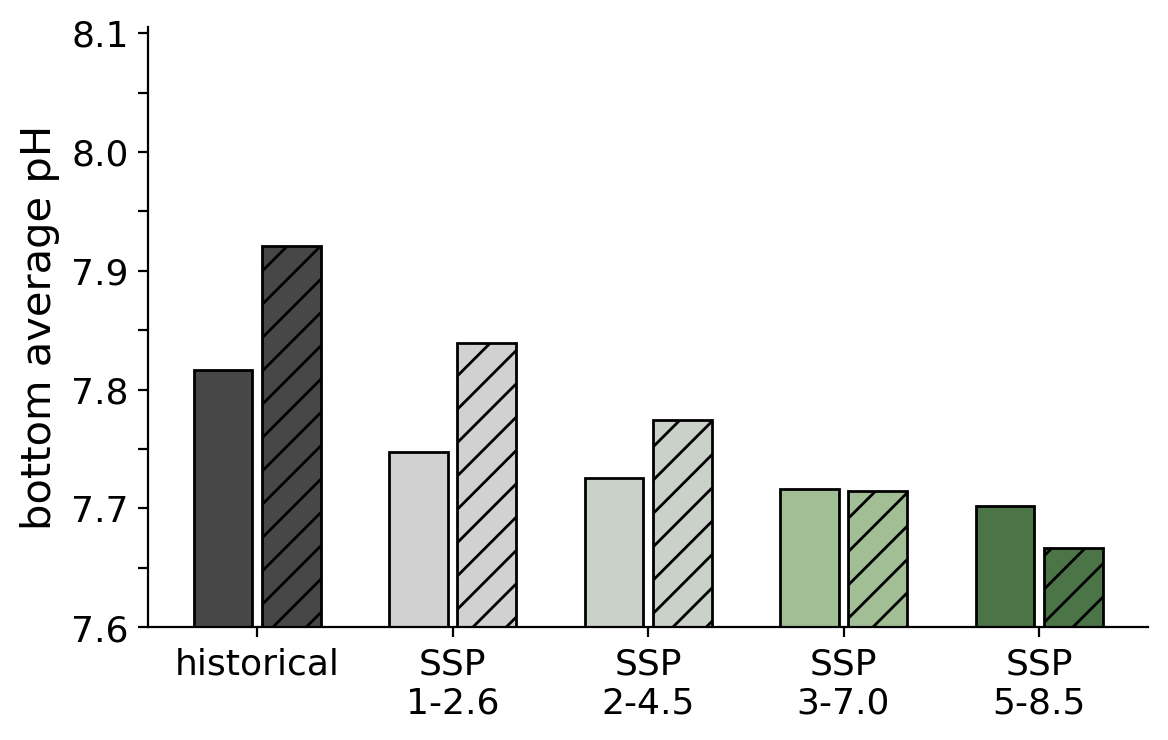

1990s (open ocean, shelf, difference): 7.816563614209494 7.920986791451772 -0.10442317724227745
2090s, ssp126 (open ocean, shelf, difference): 7.747263379891713 7.838916305700939 -0.09165292580922557
2090s, ssp245 (open ocean, shelf, difference): 7.725561610857646 7.774316608905792 -0.04875499804814609
2090s, ssp370 (open ocean, shelf, difference): 7.71627069314321 7.7150124112765 0.0012582818667103979
2090s, ssp585 (open ocean, shelf, difference): 7.702362660566966 7.666252322991689 0.03611033757527782
AntarcticPeninsula_MPA


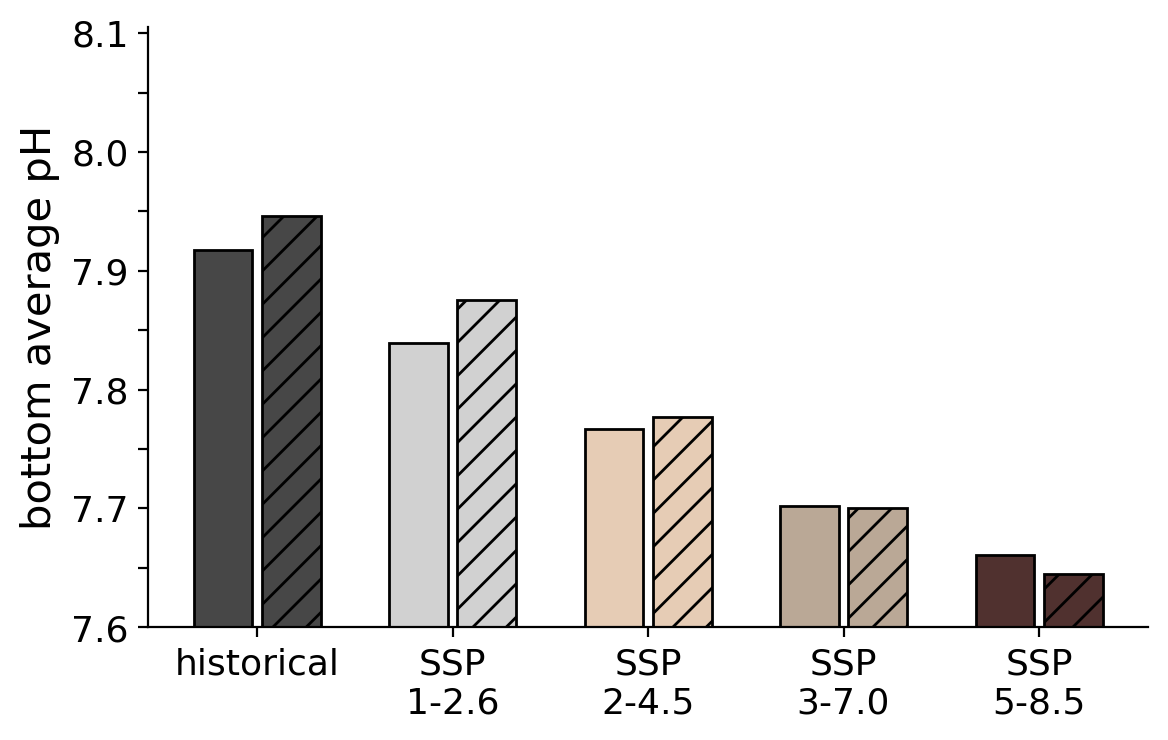

1990s (open ocean, shelf, difference): 7.917849783102672 7.9458799123764035 -0.028030129273731497
2090s, ssp126 (open ocean, shelf, difference): 7.8388964851697285 7.874954974651338 -0.03605848948160961
2090s, ssp245 (open ocean, shelf, difference): 7.766413537661235 7.777143673102062 -0.010730135440827127
2090s, ssp370 (open ocean, shelf, difference): 7.702232933044433 7.70019515355428 0.0020377794901529356
2090s, ssp585 (open ocean, shelf, difference): 7.661051630973816 7.6451205293337505 0.015931101640065393
done


In [23]:
#----
# PLOT: bar plot for pH
#----

save_plots = False
plot_eps = False
display_plots = True

depth_level = 'bottom' # for plots in paper, choose 'bottom' or 'top 200m' 

# list of regions in file
# NOTE: AntarcticPeninsula_MPA_v0 and AntarcticPeninsula_MPA are identical -> was stored twice in *nc files
subregions = ['all_shelves','WeddellSea','eWeddellSea','Prydz','Adelie','RossSea','Amundsen_Bellingshausen','WAP',\
             'RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean',\
              'WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean',\
              'Orkney_MPA','AntarcticPeninsula_MPA_v0',\
             'East_Antarctica_1_MPA','East_Antarctica_2_MPA','East_Antarctica_3_MPA','East_Antarctica_all_MPA',\
             'East_Antarctica_1_MPA_shelf','East_Antarctica_2_MPA_shelf',\
              'East_Antarctica_3_MPA_shelf','East_Antarctica_all_MPA_shelf',\
             'East_Antarctica_1_MPA_openOcean','East_Antarctica_2_MPA_openOcean',\
              'East_Antarctica_3_MPA_openOcean','East_Antarctica_all_MPA_openOcean',\
             'AntarcticPeninsula_MPA','AntarcticPeninsula_MPA_shelf','AntarcticPeninsula_MPA_openOcean']

sim_list = ['ssp585','ssp370','ssp245','ssp126','simB']
sim_list2 = ['SSP\n5-8.5','SSP\n3-7.0','SSP\n2-4.5','SSP\n1-2.6','simB']

if depth_level in ['top 2000m']:
    vari1 = 'omegaA_avg_above2000'
    vari2 = 'pH_avg_above2000'
elif depth_level in ['top 200m']:
    vari1 = 'omegaA_avg_top200'
    vari2 = 'pH_avg_top200'
elif depth_level in ['bottom']:
    vari1 = 'omegaA_avg_bottom'
    vari2 = 'pH_avg_bottom'

#----
# get data from file
#----
dataA,data_pH = get_data(vari1,vari2,path_to_data)

#----
# loop over regions and plot
#----
for rr in [8,11,14,19,28]: # HARD-CODED
    print (subregions[rr])
    if subregions[rr] in ['RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean']: # pine
        color_plot = cc1
        color_list = color_list1
        rr2 = rr+1  # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['East_Antarctica_all_MPA','East_Antarctica_all_MPA_shelf','East_Antarctica_all_MPA_openOcean']: # sage
        color_plot = cc2
        color_list = color_list2
        rr2 = rr+4 # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean']: # indigo
        color_plot = cc3
        color_list = color_list3
        rr2 = rr+1  # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['Orkney_MPA']: # blue
        color_plot = cc4
        color_list = color_list4
        rr2 = -999
    elif subregions[rr] in ['AntarcticPeninsula_MPA','AntarcticPeninsula_MPA_shelf','AntarcticPeninsula_MPA_openOcean']: # warm grey
        color_plot = cc5
        color_list = color_list5
        rr2 = rr+1  # for 'shelf' subregion
    elif subregions[rr] in ['all_shelves']: # pine
        color_plot = cc6
        color_list = color_list6
        rr2 = -999
    else:
        color_plot = 'k'
        color_list = color_list6
    
    # whole MPA annual mean
    data1 = np.mean(data_pH[:,:,rr,:],axis=0)
    data1_1990s  = np.mean(data1[0:9+1,0],axis=0)
    data1_2090s  = np.mean(data1[100:109+1,:],axis=0)
    
    # shelf subregion annual mean
    if rr2>-999: # only for the regions for which I do the separation
        data1b = np.mean(data_pH[:,:,rr2,:],axis=0)
        data1b_1990s  = np.mean(data1b[0:9+1,0],axis=0)
        data1b_2090s  = np.mean(data1b[100:109+1,:],axis=0)
        
    #---
    # all scenarios in a single plot
    #---
    width1 = 0.3
    shift = 0.35
    ec = 'k'
    fs = 13
    dpicnt = 200

    fig7= plt.figure(num=18, figsize=(5,3), dpi=dpicnt, facecolor='w', edgecolor='k')
    ax = fig7.add_axes([0, 0, 1, 1])
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #----
    # whole MPA
    #----
    plt.bar(0,data1_1990s,color=color1,width=width1,edgecolor=ec)
    plt.bar(1,data1_2090s[3],color=color_list[3],width=width1,edgecolor=ec)
    plt.bar(2,data1_2090s[2],color=color_list[2],width=width1,edgecolor=ec)
    plt.bar(3,data1_2090s[1],color=color_list[1],width=width1,edgecolor=ec)
    plt.bar(4,data1_2090s[0],color=color_list[0],width=width1,edgecolor=ec)
    #----
    # add shelf (if applicable)
    #----
    if rr2>-999: # only for the regions for which I do the separation
        hatch1 ="//"
        plt.bar(0+shift,data1b_1990s,color=color1,width=width1,edgecolor=ec,hatch=hatch1)#,label='$\Omega_{calc}$$\leq$1.0')
        plt.bar(1+shift,data1b_2090s[3],color=color_list[3],width=width1,edgecolor=ec,hatch=hatch1)#,label='$1.0\leq\Omega_{calc}$<1.5')
        plt.bar(2+shift,data1b_2090s[2],color=color_list[2],width=width1,edgecolor=ec,hatch=hatch1)
        plt.bar(3+shift,data1b_2090s[1],color=color_list[1],width=width1,edgecolor=ec,hatch=hatch1)
        plt.bar(4+shift,data1b_2090s[0],color=color_list[0],width=width1,edgecolor=ec,hatch=hatch1)
    
    if rr2==-999:
        plt.xticks([0,1,2,3,4],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
    else:
        plt.xticks([0.175,1.175,2.175,3.175,4.175],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
        
    if subregions[rr] in ['WeddellSea_MPA']:
        plt.yticks([7.6,7.65,7.7,7.75,7.8,7.85,7.9,7.95,8.0,8.05,8.1],[7.6,'',7.7,'',7.8,'',7.9,'',8.0,'',8.1],fontsize=fs)
        plt.ylim((7.6,8.105))
    else:
        plt.yticks([7.6,7.65,7.7,7.75,7.8,7.85,7.9,7.95,8.0,8.05,8.1],[7.6,'',7.7,'',7.8,'',7.9,'',8.0,'',8.1],fontsize=fs)
        plt.ylim((7.6,8.105))
        
    plt.ylabel(depth_level+' average pH',fontsize=fs+2)
    
    if save_plots:
        filename = 'pH_'+depth_level.replace(" ","")+'_'+subregions[rr]+'.png'
        plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight')
        del filename

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
    #---
    # print some numbers
    #---
    if rr2>-999:
        print('1990s (open ocean, shelf, difference):',data1_1990s,data1b_1990s,data1_1990s-data1b_1990s)
        print('2090s, ssp126 (open ocean, shelf, difference):',data1_2090s[3],data1b_2090s[3],data1_2090s[3]-data1b_2090s[3])
        print('2090s, ssp245 (open ocean, shelf, difference):',data1_2090s[2],data1b_2090s[2],data1_2090s[2]-data1b_2090s[2])
        print('2090s, ssp370 (open ocean, shelf, difference):',data1_2090s[1],data1b_2090s[1],data1_2090s[1]-data1b_2090s[1])
        print('2090s, ssp585 (open ocean, shelf, difference):',data1_2090s[0],data1b_2090s[0],data1_2090s[0]-data1b_2090s[0])
        
        
    #----
    # eps
    #----
    
    if plot_eps:
        fig7= plt.figure(num=18, figsize=(5,3), dpi=dpicnt, facecolor='w', edgecolor='k')
        ax = fig7.add_axes([0, 0, 1, 1])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #----
        # whole MPA
        #----
        plt.bar(0,data1_1990s,color=color1,width=width1,edgecolor=ec)#,label='$\Omega_{calc}$$\leq$1.0')
        plt.bar(1,data1_2090s[3],color=color_list[3],width=width1,edgecolor=ec)#,label='$1.0\leq\Omega_{calc}$<1.5')
        plt.bar(2,data1_2090s[2],color=color_list[2],width=width1,edgecolor=ec)
        plt.bar(3,data1_2090s[1],color=color_list[1],width=width1,edgecolor=ec)
        plt.bar(4,data1_2090s[0],color=color_list[0],width=width1,edgecolor=ec)
        #----
        # add shelf (if applicable)
        #----
        if rr2>-999: # only for the regions for which I do the separation
            hatch1 ="//"
            plt.bar(0+shift,data1b_1990s,color=color1,width=width1,edgecolor=ec,hatch=hatch1)#,label='$\Omega_{calc}$$\leq$1.0')
            plt.bar(1+shift,data1b_2090s[3],color=color_list[3],width=width1,edgecolor=ec,hatch=hatch1)#,label='$1.0\leq\Omega_{calc}$<1.5')
            plt.bar(2+shift,data1b_2090s[2],color=color_list[2],width=width1,edgecolor=ec,hatch=hatch1)
            plt.bar(3+shift,data1b_2090s[1],color=color_list[1],width=width1,edgecolor=ec,hatch=hatch1)
            plt.bar(4+shift,data1b_2090s[0],color=color_list[0],width=width1,edgecolor=ec,hatch=hatch1)
            print ('shelf (1990s, 4 scenarios):',data1b_1990s,data1b_2090s[3],data1b_2090s[2],data1b_2090s[1],data1b_2090s[0])
        
        if rr2==-999:
            plt.xticks([0,1,2,3,4],[],fontsize=fs) #fontweight='bold',
        else:
            plt.xticks([0.175,1.175,2.175,3.175,4.175],[],fontsize=fs) #fontweight='bold',

        if subregions[rr] in ['WeddellSea_MPA']:
            plt.yticks([7.6,7.65,7.7,7.75,7.8,7.85,7.9,7.95,8.0,8.05,8.1],[],fontsize=fs)
            plt.ylim((7.6,8.105))
        else:
            plt.yticks([7.6,7.65,7.7,7.75,7.8,7.85,7.9,7.95,8.0,8.05,8.1],[],fontsize=fs)
            plt.ylim((7.6,8.105))
            
        if save_plots:
            filename = 'pH_'+depth_level.replace(" ","")+'_'+subregions[rr]+'.eps'
            plt.savefig(savepath+'eps/'+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
            del filename

        if display_plots:
            plt.show()
        else:
            plt.close(fig7)
                
        print ('')
        
print ('done')



Load  omegaA_avg_bottom pH_avg_bottom
data_all_Arag.shape (months x years x regions x simulations): (12, 111, 31, 5)
RossSea_MPA
RossSea_MPA_shelf


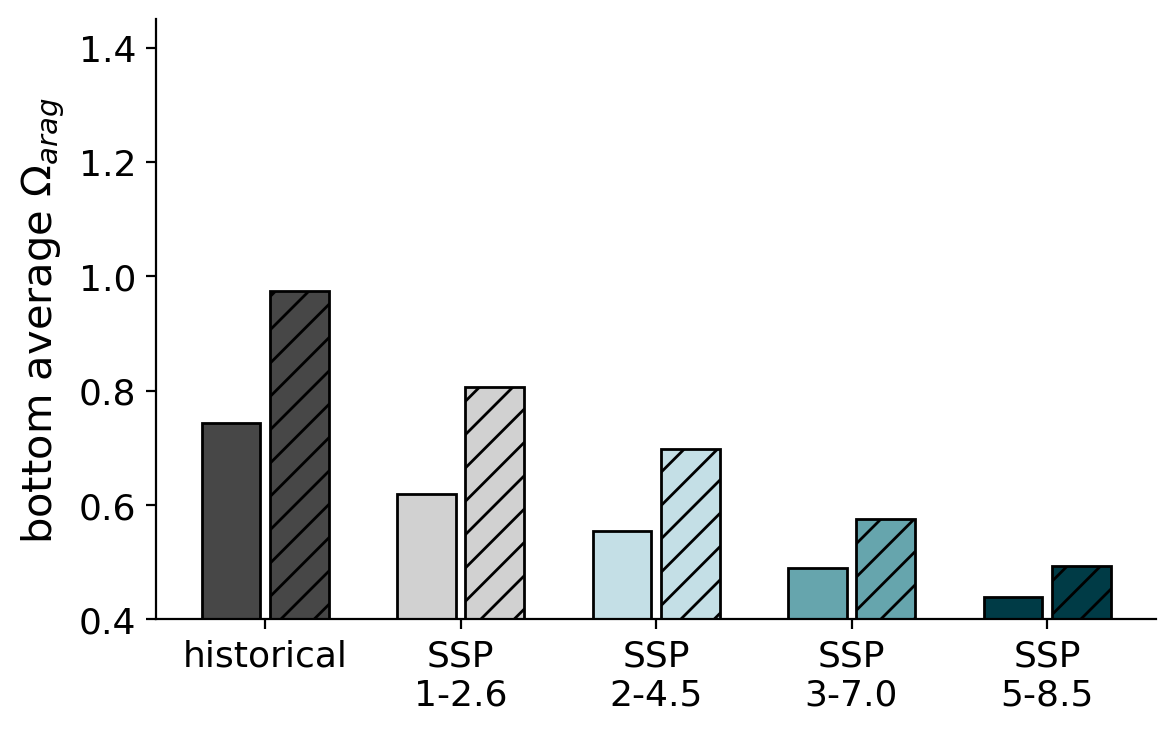

1990s (open ocean, shelf, difference): 0.7424051592747369 0.9750627001126608 -0.2326575408379239
2090s, ssp126 (open ocean, shelf, difference): 0.6183964903155963 0.806009835501512 -0.18761334518591566
2090s, ssp245 (open ocean, shelf, difference): 0.5538659567634265 0.6976798156897227 -0.14381385892629617
2090s, ssp370 (open ocean, shelf, difference): 0.49033525586128235 0.5747078036268551 -0.08437254776557279
2090s, ssp585 (open ocean, shelf, difference): 0.4387329104046027 0.4927033086617788 -0.05397039825717609
WeddellSea_MPA
WeddellSea_MPA_shelf


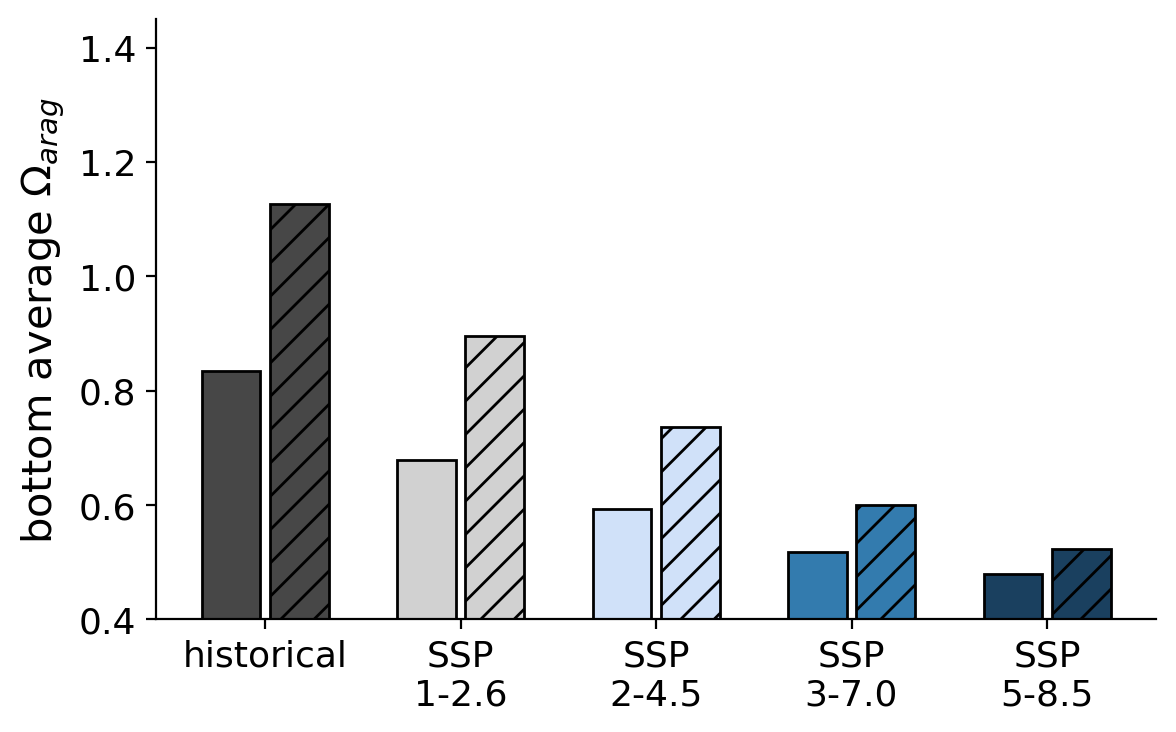

1990s (open ocean, shelf, difference): 0.8350071797768276 1.126252818107605 -0.29124563833077743
2090s, ssp126 (open ocean, shelf, difference): 0.6792349343498547 0.8950521732370058 -0.2158172388871511
2090s, ssp245 (open ocean, shelf, difference): 0.5923876762390136 0.7371317520737649 -0.14474407583475135
2090s, ssp370 (open ocean, shelf, difference): 0.5167579367756844 0.5991619065403937 -0.08240396976470932
2090s, ssp585 (open ocean, shelf, difference): 0.4782032407820225 0.5228593103587627 -0.044656069576740176
Orkney_MPA


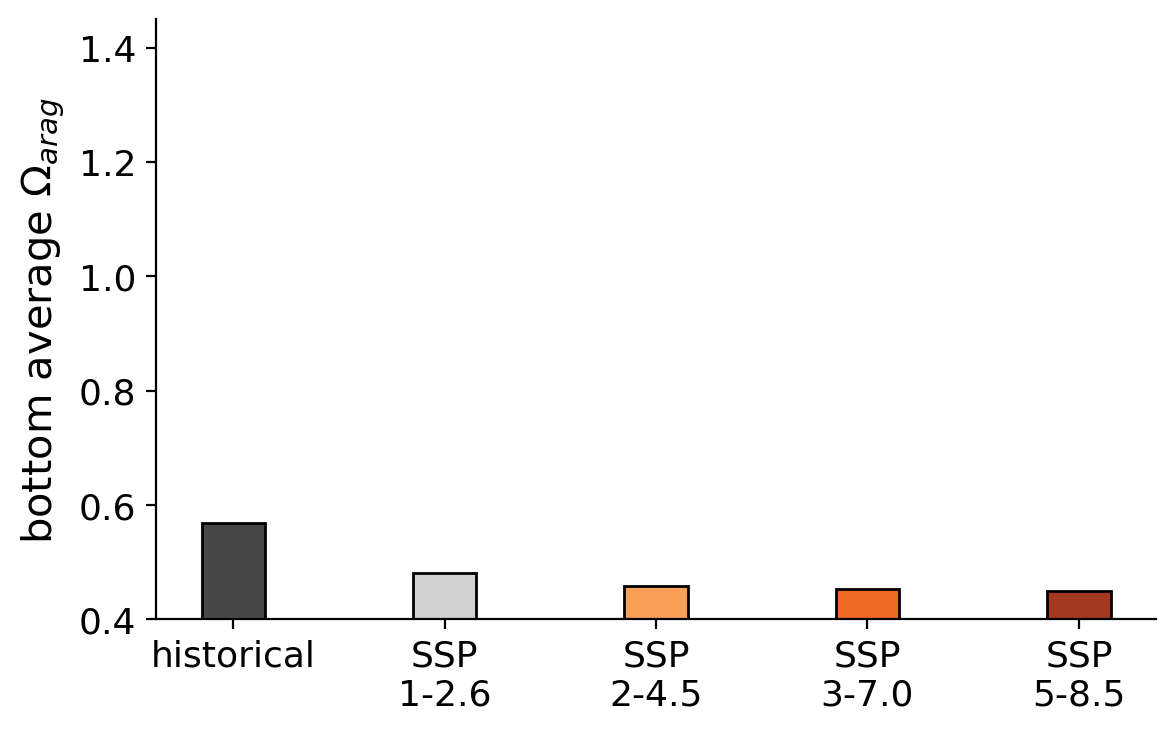

East_Antarctica_all_MPA
East_Antarctica_all_MPA_shelf


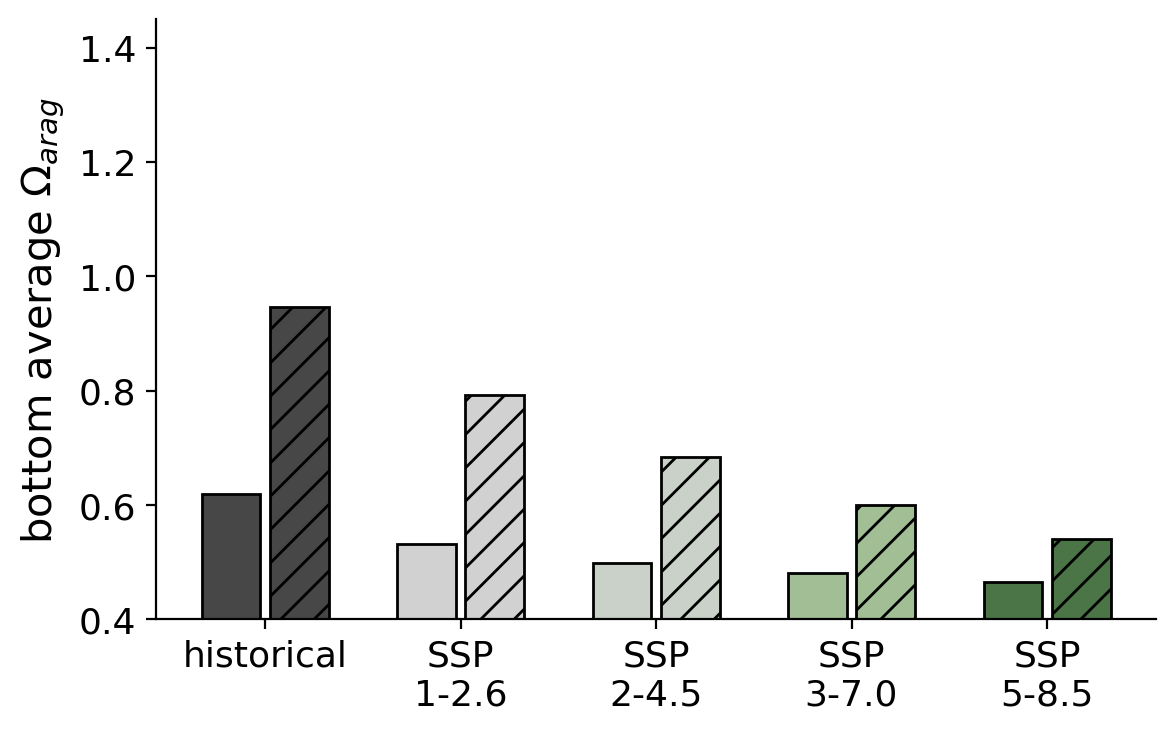

1990s (open ocean, shelf, difference): 0.6195863510171572 0.9461949989199638 -0.32660864790280664
2090s, ssp126 (open ocean, shelf, difference): 0.5318146467208862 0.7919686501224836 -0.26015400340159744
2090s, ssp245 (open ocean, shelf, difference): 0.4983175039291382 0.683149304986 -0.1848318010568618
2090s, ssp370 (open ocean, shelf, difference): 0.48108727137247725 0.5989328036705653 -0.11784553229808808
2090s, ssp585 (open ocean, shelf, difference): 0.4649663560092449 0.5394857088724773 -0.07451935286323236
AntarcticPeninsula_MPA


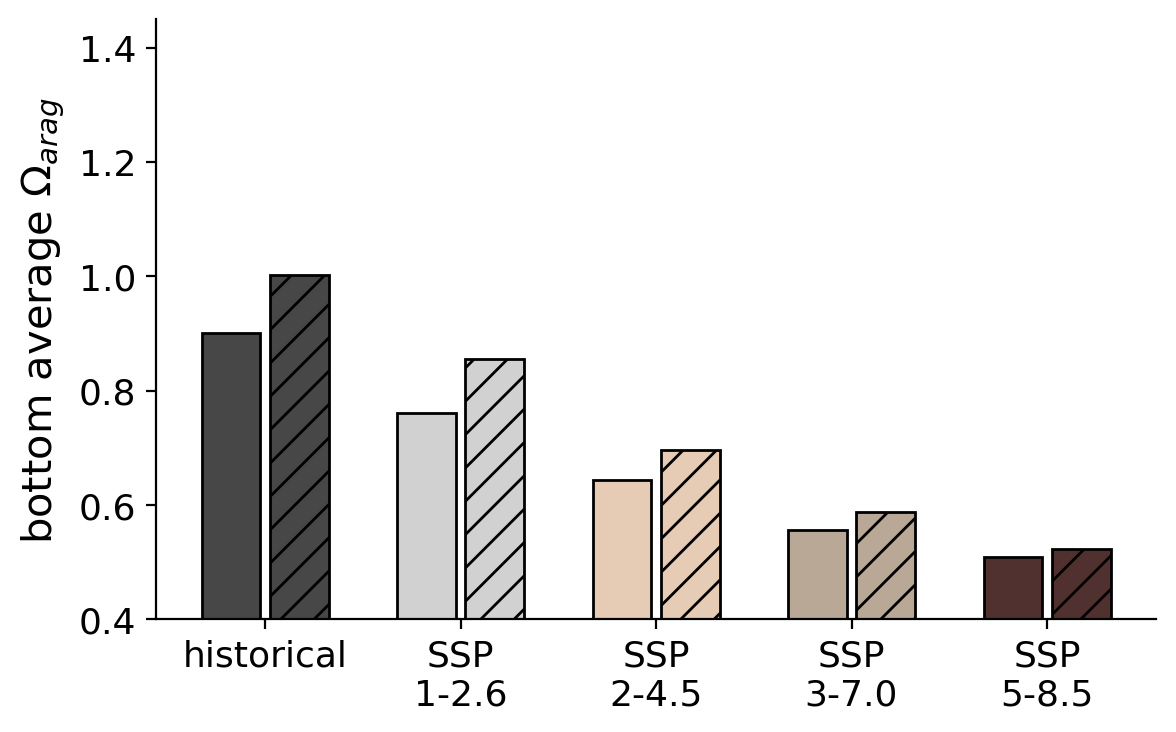

1990s (open ocean, shelf, difference): 0.9003228267033894 1.002254648009936 -0.10193182130654654
2090s, ssp126 (open ocean, shelf, difference): 0.761594457924366 0.8561047171552975 -0.09451025923093148
2090s, ssp245 (open ocean, shelf, difference): 0.6443477456768354 0.6968745907147725 -0.05252684503793714
2090s, ssp370 (open ocean, shelf, difference): 0.5564413771033287 0.5880124901731809 -0.031571113069852164
2090s, ssp585 (open ocean, shelf, difference): 0.5084680912395318 0.5235063920418421 -0.015038300802310278
done


In [24]:
#----
# PLOT: bar plot for omega aragonite (not in paper)
#----

save_plots = False
plot_eps = False
display_plots = True

depth_level = 'bottom' # for plots in paper, choose 'bottom' or 'top 200m' 
vari_string = '$\Omega_{arag}$'

# list of regions in file
# NOTE: AntarcticPeninsula_MPA_v0 and AntarcticPeninsula_MPA are identical -> was stored twice in *nc files
subregions = ['all_shelves','WeddellSea','eWeddellSea','Prydz','Adelie','RossSea','Amundsen_Bellingshausen','WAP',\
             'RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean',\
              'WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean',\
              'Orkney_MPA','AntarcticPeninsula_MPA_v0',\
             'East_Antarctica_1_MPA','East_Antarctica_2_MPA','East_Antarctica_3_MPA','East_Antarctica_all_MPA',\
             'East_Antarctica_1_MPA_shelf','East_Antarctica_2_MPA_shelf',\
              'East_Antarctica_3_MPA_shelf','East_Antarctica_all_MPA_shelf',\
             'East_Antarctica_1_MPA_openOcean','East_Antarctica_2_MPA_openOcean',\
              'East_Antarctica_3_MPA_openOcean','East_Antarctica_all_MPA_openOcean',\
             'AntarcticPeninsula_MPA','AntarcticPeninsula_MPA_shelf','AntarcticPeninsula_MPA_openOcean']

sim_list = ['ssp585','ssp370','ssp245','ssp126','simB']
sim_list2 = ['SSP\n5-8.5','SSP\n3-7.0','SSP\n2-4.5','SSP\n1-2.6','simB']

if depth_level in ['top 2000m']:
    vari1 = 'omegaA_avg_above2000'
    vari2 = 'pH_avg_above2000'
elif depth_level in ['top 200m']:
    vari1 = 'omegaA_avg_top200'
    vari2 = 'pH_avg_top200'
elif depth_level in ['bottom']:
    vari1 = 'omegaA_avg_bottom'
    vari2 = 'pH_avg_bottom'

#----
# get data from file
#----
dataA,dataC = get_data(vari1,vari2,path_to_data)

#----
# loop over regions and plot
#----
for rr in [8,11,14,19,28]: # HARD-CODED
    
    print (subregions[rr])
    if subregions[rr] in ['RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean']: # pine
        color_plot = cc1
        color_list = color_list1
        rr2 = rr+1  # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['East_Antarctica_all_MPA','East_Antarctica_all_MPA_shelf','East_Antarctica_all_MPA_openOcean']: # sage
        color_plot = cc2
        color_list = color_list2
        rr2 = rr+4 # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean']: # indigo
        color_plot = cc3
        color_list = color_list3
        rr2 = rr+1  # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['Orkney_MPA']: # blue
        color_plot = cc4
        color_list = color_list4
        rr2 = -999
    elif subregions[rr] in ['AntarcticPeninsula_MPA','AntarcticPeninsula_MPA_shelf','AntarcticPeninsula_MPA_openOcean']: # warm grey
        color_plot = cc5
        color_list = color_list5
        rr2 = rr+1  # for 'shelf' subregion
    elif subregions[rr] in ['all_shelves']: # pine
        color_plot = cc6
        color_list = color_list6
        rr2 = -999
    else:
        color_plot = 'k'
        color_list = color_list6
    
    # whole MPA annual mean
    data1 = np.mean(dataA[:,:,rr,:],axis=0)
    data1_1990s  = np.mean(data1[0:9+1,0],axis=0)
    data1_2090s  = np.mean(data1[100:109+1,:],axis=0)
    
    # shelf subregion annual mean
    if rr2>-999: # only for the regions for which I do the separation
        data1b = np.mean(dataA[:,:,rr2,:],axis=0)
        data1b_1990s  = np.mean(data1b[0:9+1,0],axis=0)
        data1b_2090s  = np.mean(data1b[100:109+1,:],axis=0)
        
    #---
    # all scenarios in a single plot
    #---
    width1 = 0.3
    shift = 0.35
    ec = 'k'
    fs = 13
    dpicnt = 200
            
    fig7= plt.figure(num=18, figsize=(5,3), dpi=dpicnt, facecolor='w', edgecolor='k')
    ax = fig7.add_axes([0, 0, 1, 1])
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #---
    # whole MPA
    #---
    plt.bar(0,data1_1990s,color=color1,width=width1,edgecolor=ec)#,label='$\Omega_{calc}$$\leq$1.0')
    plt.bar(1,data1_2090s[3],color=color_list[3],width=width1,edgecolor=ec)#,label='$1.0\leq\Omega_{calc}$<1.5')
    plt.bar(2,data1_2090s[2],color=color_list[2],width=width1,edgecolor=ec)
    plt.bar(3,data1_2090s[1],color=color_list[1],width=width1,edgecolor=ec)
    plt.bar(4,data1_2090s[0],color=color_list[0],width=width1,edgecolor=ec)
    #----
    # add shelf (if applicable)
    #----
    if rr2>-999: # only for the regions for which I do the separation
        hatch1 ="//"
        plt.bar(0+shift,data1b_1990s,color=color1,width=width1,edgecolor=ec,hatch=hatch1)#,label='$\Omega_{calc}$$\leq$1.0')
        plt.bar(1+shift,data1b_2090s[3],color=color_list[3],width=width1,edgecolor=ec,hatch=hatch1)#,label='$1.0\leq\Omega_{calc}$<1.5')
        plt.bar(2+shift,data1b_2090s[2],color=color_list[2],width=width1,edgecolor=ec,hatch=hatch1)
        plt.bar(3+shift,data1b_2090s[1],color=color_list[1],width=width1,edgecolor=ec,hatch=hatch1)
        plt.bar(4+shift,data1b_2090s[0],color=color_list[0],width=width1,edgecolor=ec,hatch=hatch1)
    
    if rr2==-999:
        plt.xticks([0,1,2,3,4],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
    else:
        plt.xticks([0.175,1.175,2.175,3.175,4.175],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
        
    if subregions[rr] in ['WeddellSea_MPA']:
        plt.yticks([0.4,0.6,0.8,1.0,1.2,1.4],[0.4,0.6,0.8,1.0,1.2,1.4],fontsize=fs)
        plt.ylim((0.4,1.45))
    else:
        plt.yticks([0.4,0.6,0.8,1.0,1.2,1.4],[0.4,0.6,0.8,1.0,1.2,1.4],fontsize=fs)
        plt.ylim((0.4,1.45))
        
    plt.ylabel(depth_level+' average '+vari_string,fontsize=fs+2)
    
    if save_plots:
        filename = 'OmegaA_'+depth_level.replace(" ","")+'_'+subregions[rr]+'.png'
        plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight')
        del filename

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
    #---
    # print some numbers 
    #---
    if rr2>-999:
        print('1990s (open ocean, shelf, difference):',data1_1990s,data1b_1990s,data1_1990s-data1b_1990s)
        print('2090s, ssp126 (open ocean, shelf, difference):',data1_2090s[3],data1b_2090s[3],data1_2090s[3]-data1b_2090s[3])
        print('2090s, ssp245 (open ocean, shelf, difference):',data1_2090s[2],data1b_2090s[2],data1_2090s[2]-data1b_2090s[2])
        print('2090s, ssp370 (open ocean, shelf, difference):',data1_2090s[1],data1b_2090s[1],data1_2090s[1]-data1b_2090s[1])
        print('2090s, ssp585 (open ocean, shelf, difference):',data1_2090s[0],data1b_2090s[0],data1_2090s[0]-data1b_2090s[0])
        
    #----
    # eps
    #----
    if plot_eps:
        fig7= plt.figure(num=18, figsize=(5,3), dpi=dpicnt, facecolor='w', edgecolor='k')
        ax = fig7.add_axes([0, 0, 1, 1])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #----
        # whole MPA
        #----
        plt.bar(0,data1_1990s,color=color1,width=width1,edgecolor=ec)#,label='$\Omega_{calc}$$\leq$1.0')
        plt.bar(1,data1_2090s[3],color=color_list[3],width=width1,edgecolor=ec)#,label='$1.0\leq\Omega_{calc}$<1.5')
        plt.bar(2,data1_2090s[2],color=color_list[2],width=width1,edgecolor=ec)
        plt.bar(3,data1_2090s[1],color=color_list[1],width=width1,edgecolor=ec)
        plt.bar(4,data1_2090s[0],color=color_list[0],width=width1,edgecolor=ec)
        #----
        # add shelf (if applicable)
        #----
        if rr2>-999: # only for the regions for which I do the separation
            hatch1 ="//"
            plt.bar(0+shift,data1b_1990s,color=color1,width=width1,edgecolor=ec,hatch=hatch1)#,label='$\Omega_{calc}$$\leq$1.0')
            plt.bar(1+shift,data1b_2090s[3],color=color_list[3],width=width1,edgecolor=ec,hatch=hatch1)#,label='$1.0\leq\Omega_{calc}$<1.5')
            plt.bar(2+shift,data1b_2090s[2],color=color_list[2],width=width1,edgecolor=ec,hatch=hatch1)
            plt.bar(3+shift,data1b_2090s[1],color=color_list[1],width=width1,edgecolor=ec,hatch=hatch1)
            plt.bar(4+shift,data1b_2090s[0],color=color_list[0],width=width1,edgecolor=ec,hatch=hatch1)
            print ('shelf (1990s, 4 scenarios):',data1b_1990s,data1b_2090s[3],data1b_2090s[2],data1b_2090s[1],data1b_2090s[0])
        
        if rr2==-999:
            plt.xticks([0,1,2,3,4],[],fontsize=fs) #fontweight='bold',
        else:
            plt.xticks([0.175,1.175,2.175,3.175,4.175],[],fontsize=fs) #fontweight='bold',

        if subregions[rr] in ['WeddellSea_MPA']:
            plt.yticks([0.4,0.6,0.8,1.0,1.2,1.4],[],fontsize=fs)
            plt.ylim((0.4,1.45))
        else:
            plt.yticks([0.4,0.6,0.8,1.0,1.2,1.4],[],fontsize=fs)
            plt.ylim((0.4,1.45))

        if save_plots:
            filename = 'OmegaA_'+depth_level.replace(" ","")+'_'+subregions[rr]+'.eps'
            plt.savefig(savepath+'eps/'+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
            del filename

        if display_plots_eps:
            plt.show()
        else:
            plt.close(fig7)
                
        print ('')
        
print ('done')


Load  omegaA_avg_bottom omegaC_avg_bottom
data_all_Arag.shape (months x years x regions x simulations): (12, 111, 31, 5)
RossSea_MPA
RossSea_MPA_shelf


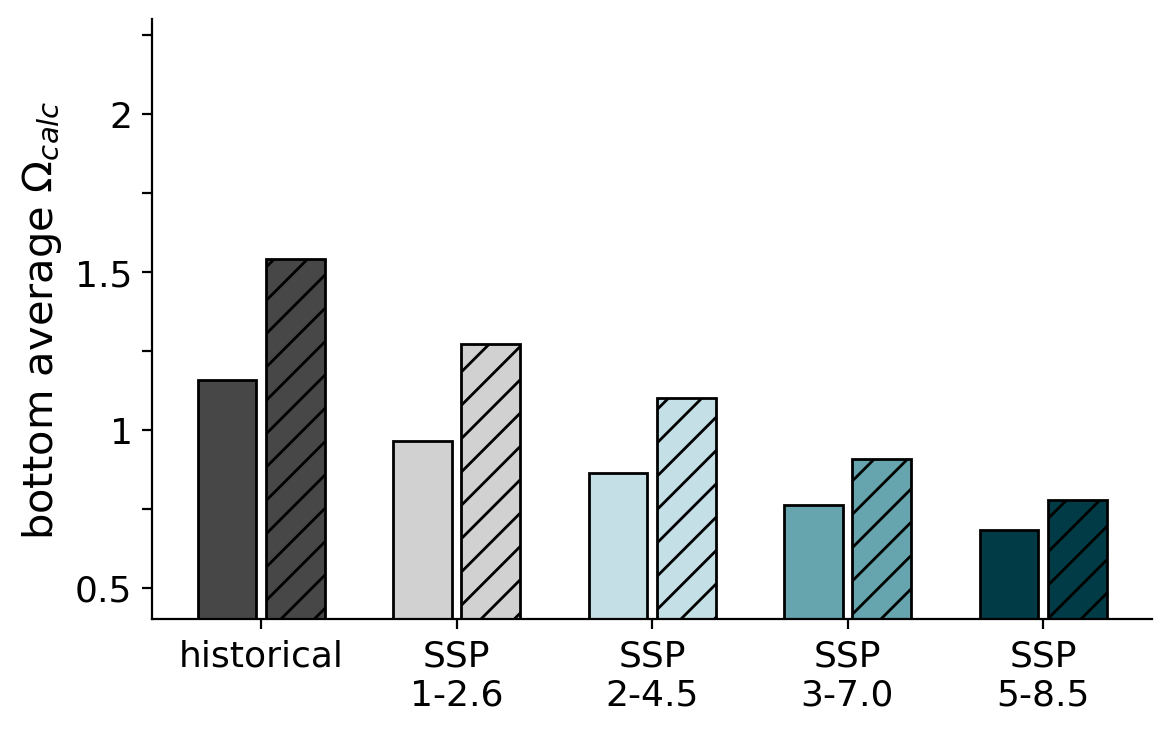

1990s (open ocean, shelf, difference): 1.1577937106291452 1.53905521829923 -0.38126150767008493
2090s, ssp126 (open ocean, shelf, difference): 0.9643731852372488 1.2725025922060014 -0.3081294069687526
2090s, ssp245 (open ocean, shelf, difference): 0.8630502675970394 1.1011586368083954 -0.23810836921135603
2090s, ssp370 (open ocean, shelf, difference): 0.7630350599686304 0.9070886944731077 -0.14405363450447728
2090s, ssp585 (open ocean, shelf, difference): 0.6821695004900297 0.7774986053506534 -0.09532910486062374
WeddellSea_MPA
WeddellSea_MPA_shelf


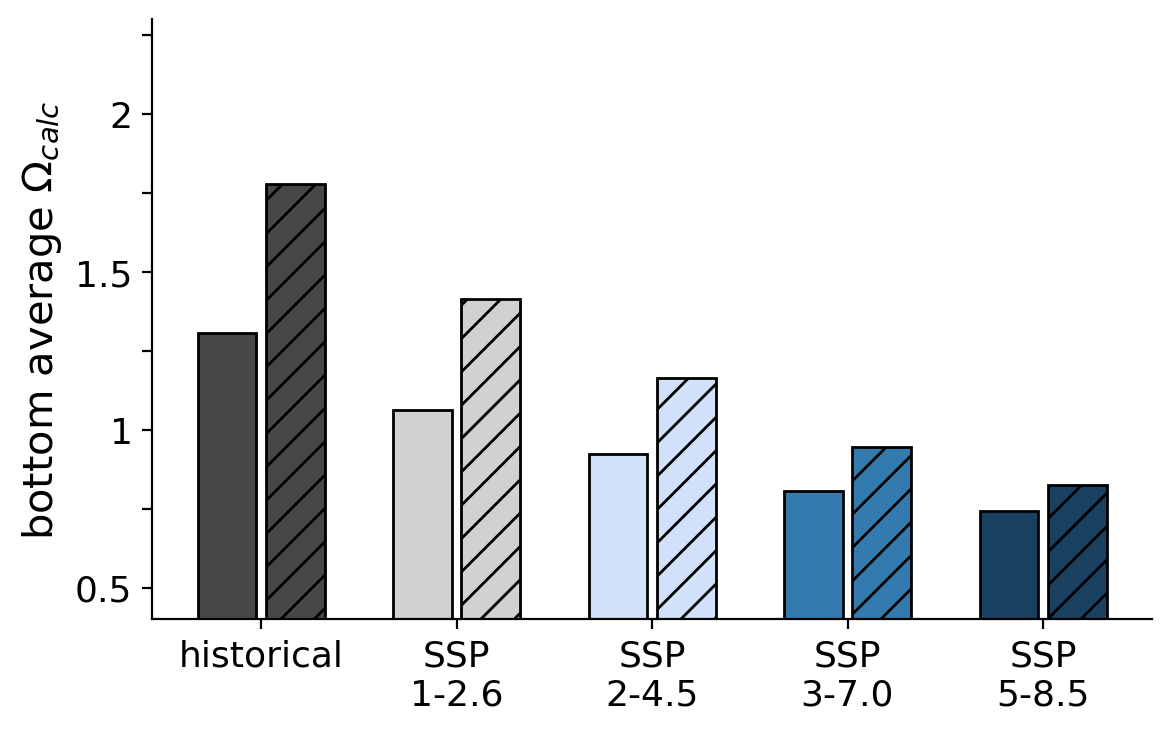

1990s (open ocean, shelf, difference): 1.3061661452054978 1.7793853014707566 -0.4732191562652588
2090s, ssp126 (open ocean, shelf, difference): 1.0617950191100438 1.4144707798957823 -0.3526757607857385
2090s, ssp245 (open ocean, shelf, difference): 0.9245029374957084 1.164541177948316 -0.24003824045260747
2090s, ssp370 (open ocean, shelf, difference): 0.8049597789843876 0.9462886611620585 -0.1413288821776708
2090s, ssp585 (open ocean, shelf, difference): 0.743763015170892 0.8254219089945156 -0.08165889382362357
Orkney_MPA


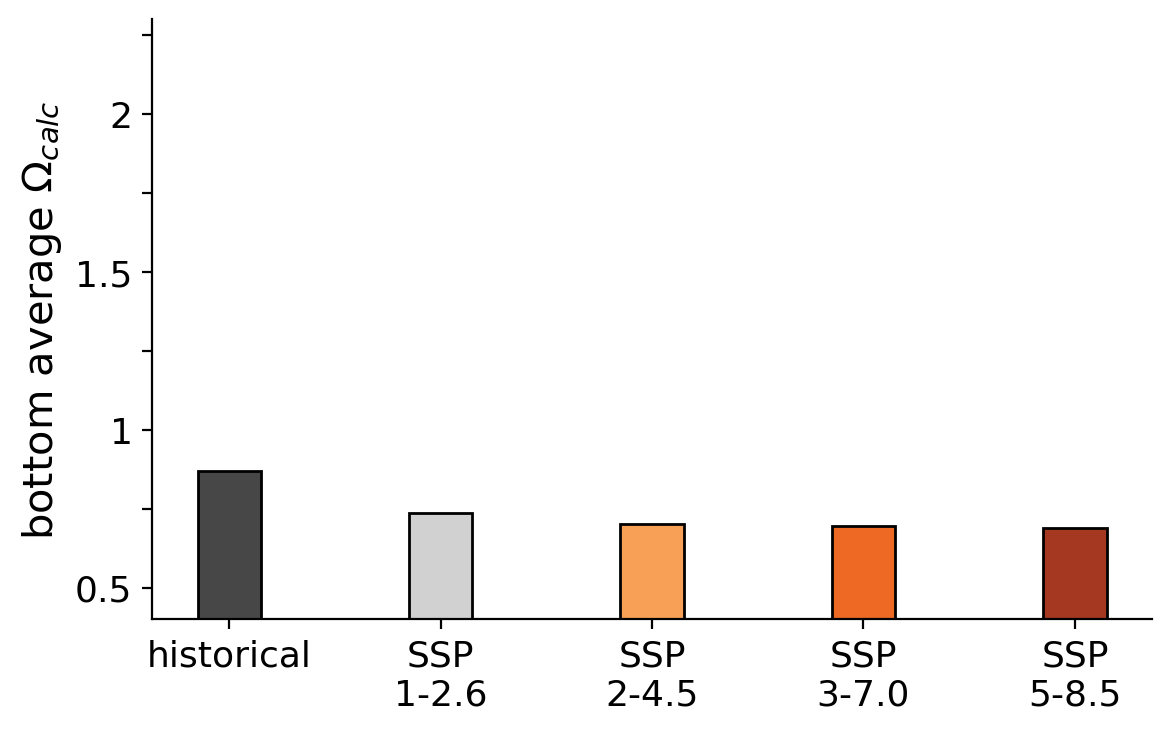

East_Antarctica_all_MPA
East_Antarctica_all_MPA_shelf


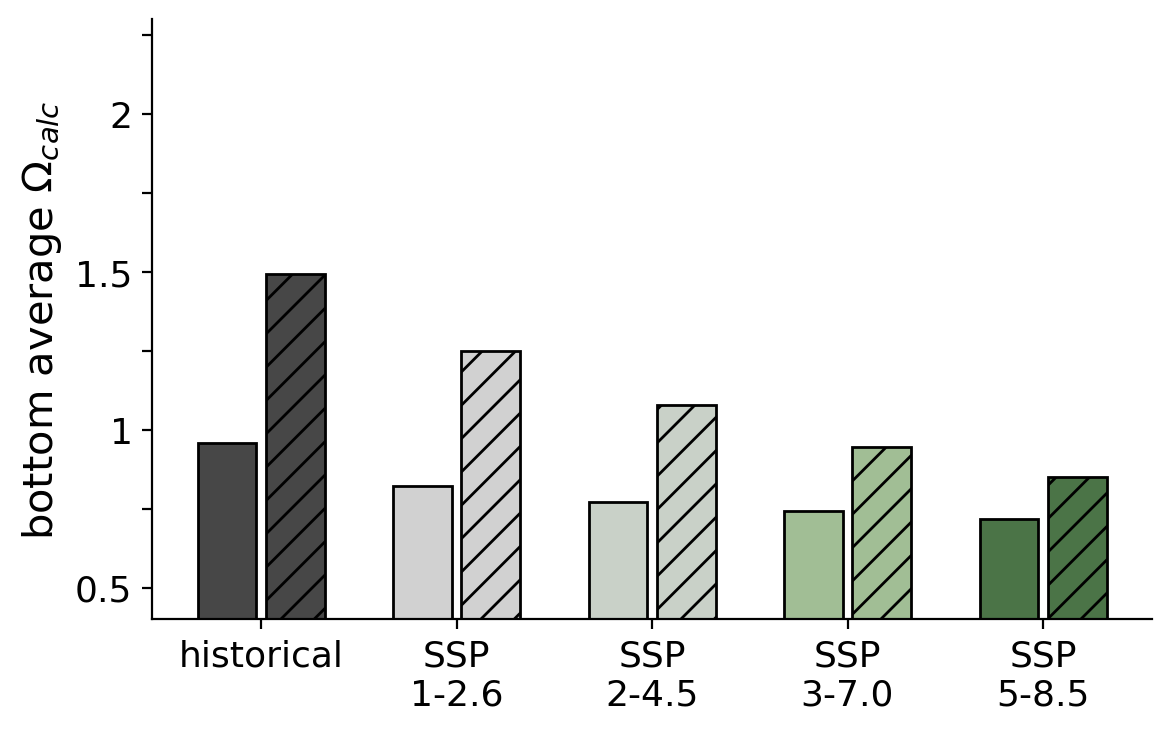

1990s (open ocean, shelf, difference): 0.9592527613043786 1.4934568842252098 -0.5342041229208312
2090s, ssp126 (open ocean, shelf, difference): 0.8231037572026253 1.2502114713191985 -0.4271077141165732
2090s, ssp245 (open ocean, shelf, difference): 0.7702435051401457 1.0780290087064108 -0.3077855035662651
2090s, ssp370 (open ocean, shelf, difference): 0.7425387625892956 0.9446187958121302 -0.20208003322283452
2090s, ssp585 (open ocean, shelf, difference): 0.7169699296355249 0.8504858826597532 -0.13351595302422836
AntarcticPeninsula_MPA


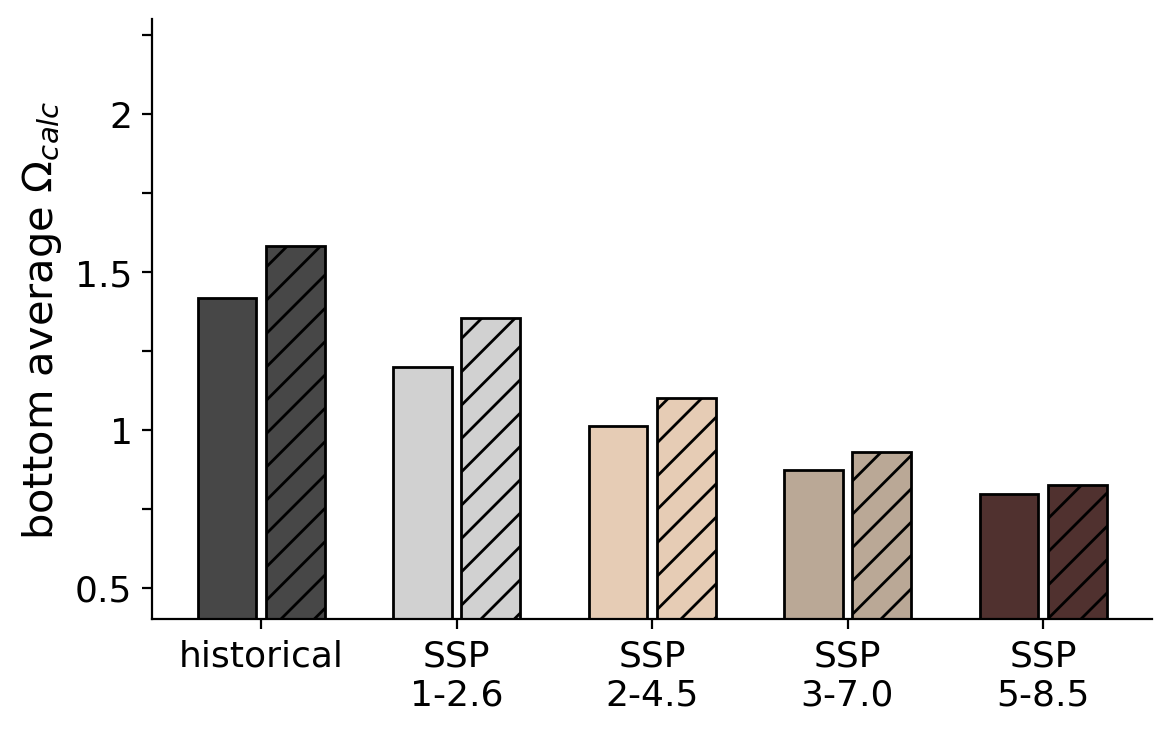

1990s (open ocean, shelf, difference): 1.4154621144135793 1.5827806919813157 -0.16731857756773638
2090s, ssp126 (open ocean, shelf, difference): 1.1980524082978568 1.3526497930288313 -0.1545973847309745
2090s, ssp245 (open ocean, shelf, difference): 1.0124479085206988 1.1005857348442079 -0.08813782632350908
2090s, ssp370 (open ocean, shelf, difference): 0.8738181670506796 0.9285160104433696 -0.054697843392690015
2090s, ssp585 (open ocean, shelf, difference): 0.7978453859686852 0.8263563926021259 -0.02851100663344075
done


In [25]:
#----
# PLOT: bar plot for omega calcite (not in paper)
#----

save_plots = False
plot_eps = False
display_plots = True

depth_level = 'bottom' # for plots in paper, choose 'bottom' or 'top 200m' 
vari_string = '$\Omega_{calc}$'

# list of regions in file
# NOTE: AntarcticPeninsula_MPA_v0 and AntarcticPeninsula_MPA are identical -> was stored twice in *nc files
subregions = ['all_shelves','WeddellSea','eWeddellSea','Prydz','Adelie','RossSea','Amundsen_Bellingshausen','WAP',\
             'RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean',\
              'WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean',\
              'Orkney_MPA','AntarcticPeninsula_MPA_v0',\
             'East_Antarctica_1_MPA','East_Antarctica_2_MPA','East_Antarctica_3_MPA','East_Antarctica_all_MPA',\
             'East_Antarctica_1_MPA_shelf','East_Antarctica_2_MPA_shelf',\
              'East_Antarctica_3_MPA_shelf','East_Antarctica_all_MPA_shelf',\
             'East_Antarctica_1_MPA_openOcean','East_Antarctica_2_MPA_openOcean',\
              'East_Antarctica_3_MPA_openOcean','East_Antarctica_all_MPA_openOcean',\
             'AntarcticPeninsula_MPA','AntarcticPeninsula_MPA_shelf','AntarcticPeninsula_MPA_openOcean']

sim_list = ['ssp585','ssp370','ssp245','ssp126','simB']
sim_list2 = ['SSP\n5-8.5','SSP\n3-7.0','SSP\n2-4.5','SSP\n1-2.6','simB']

if depth_level in ['top 2000m']:
    vari1 = 'omegaA_avg_above2000'
    vari2 = 'omegaC_avg_above2000'
elif depth_level in ['top 200m']:
    vari1 = 'omegaA_avg_top200'
    vari2 = 'omegaC_avg_top200'
elif depth_level in ['bottom']:
    vari1 = 'omegaA_avg_bottom'
    vari2 = 'omegaC_avg_bottom'

#----
# get data from file
#----
dataA,dataC = get_data(vari1,vari2,path_to_data)

#----
# loop over regions and plot
#----
for rr in [8,11,14,19,28]: # HARD-CODED
    
    print (subregions[rr])
    if subregions[rr] in ['RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean']: # pine
        color_plot = cc1
        color_list = color_list1
        rr2 = rr+1 # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['East_Antarctica_all_MPA','East_Antarctica_all_MPA_shelf','East_Antarctica_all_MPA_openOcean']: # sage
        color_plot = cc2
        color_list = color_list2
        rr2 = rr+4 # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean']: # indigo
        color_plot = cc3
        color_list = color_list3
        rr2 = rr+1 # for 'shelf' subregion
        print (subregions[rr2])
    elif subregions[rr] in ['Orkney_MPA']: # blue
        color_plot = cc4
        color_list = color_list4
        rr2 = -999
    elif subregions[rr] in ['AntarcticPeninsula_MPA','AntarcticPeninsula_MPA_shelf','AntarcticPeninsula_MPA_openOcean']: # warm grey
        color_plot = cc5
        color_list = color_list5
        rr2 = rr+1  # for 'shelf' subregion
    elif subregions[rr] in ['all_shelves']: # pine
        color_plot = cc6
        color_list = color_list6
        rr2 = -999
    else:
        color_plot = 'k'
        color_list = color_list6
    
    # whole MPA annual mean
    data1 = np.mean(dataC[:,:,rr,:],axis=0)
    data1_1990s  = np.mean(data1[0:9+1,0],axis=0)
    data1_2090s  = np.mean(data1[100:109+1,:],axis=0)
    
    # shelf subregion annual mean
    if rr2>-999: # only for the regions for which I do the separation
        data1b = np.mean(dataC[:,:,rr2,:],axis=0)
        data1b_1990s  = np.mean(data1b[0:9+1,0],axis=0)
        data1b_2090s  = np.mean(data1b[100:109+1,:],axis=0)
        
    #---
    # all scenarios in a single plot
    #---
    width1 = 0.3
    shift = 0.35
    ec = 'k'
    fs = 13
    dpicnt = 200
                
    fig7= plt.figure(num=18, figsize=(5,3), dpi=dpicnt, facecolor='w', edgecolor='k')
    ax = fig7.add_axes([0, 0, 1, 1])
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #----
    # whole MPA
    #----
    plt.bar(0,data1_1990s,color=color1,width=width1,edgecolor=ec)#,label='$\Omega_{calc}$$\leq$1.0')
    plt.bar(1,data1_2090s[3],color=color_list[3],width=width1,edgecolor=ec)#,label='$1.0\leq\Omega_{calc}$<1.5')
    plt.bar(2,data1_2090s[2],color=color_list[2],width=width1,edgecolor=ec)
    plt.bar(3,data1_2090s[1],color=color_list[1],width=width1,edgecolor=ec)
    plt.bar(4,data1_2090s[0],color=color_list[0],width=width1,edgecolor=ec)
    #----
    # add shelf (if applicable)
    #----
    if rr2>-999: # only for the regions for which I do the separation
        hatch1 ="//"
        plt.bar(0+shift,data1b_1990s,color=color1,width=width1,edgecolor=ec,hatch=hatch1)#,label='$\Omega_{calc}$$\leq$1.0')
        plt.bar(1+shift,data1b_2090s[3],color=color_list[3],width=width1,edgecolor=ec,hatch=hatch1)#,label='$1.0\leq\Omega_{calc}$<1.5')
        plt.bar(2+shift,data1b_2090s[2],color=color_list[2],width=width1,edgecolor=ec,hatch=hatch1)
        plt.bar(3+shift,data1b_2090s[1],color=color_list[1],width=width1,edgecolor=ec,hatch=hatch1)
        plt.bar(4+shift,data1b_2090s[0],color=color_list[0],width=width1,edgecolor=ec,hatch=hatch1)
    
    if rr2==-999:
        plt.xticks([0,1,2,3,4],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
    else:
        plt.xticks([0.175,1.175,2.175,3.175,4.175],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
        
    if subregions[rr] in ['WeddellSea_MPA']:
        plt.yticks([0.5,0.75,1,1.25,1.5,1.75,2,2.25],[0.5,'',1,'',1.5,'',2,''],fontsize=fs)
        plt.ylim((0.4,2.3))
    else:
        plt.yticks([0.5,0.75,1,1.25,1.5,1.75,2,2.25],[0.5,'',1,'',1.5,'',2,''],fontsize=fs)
        plt.ylim((0.4,2.3))
        
    plt.ylabel(depth_level+' average '+vari_string,fontsize=fs+2)
    
    if save_plots:
        filename = 'OmegaC_'+depth_level.replace(" ","")+'_'+subregions[rr]+'.png'
        plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight')
        del filename

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
    #---
    # print some numbers
    #---
    if rr2>-999:
        print('1990s (open ocean, shelf, difference):',data1_1990s,data1b_1990s,data1_1990s-data1b_1990s)
        print('2090s, ssp126 (open ocean, shelf, difference):',data1_2090s[3],data1b_2090s[3],data1_2090s[3]-data1b_2090s[3])
        print('2090s, ssp245 (open ocean, shelf, difference):',data1_2090s[2],data1b_2090s[2],data1_2090s[2]-data1b_2090s[2])
        print('2090s, ssp370 (open ocean, shelf, difference):',data1_2090s[1],data1b_2090s[1],data1_2090s[1]-data1b_2090s[1])
        print('2090s, ssp585 (open ocean, shelf, difference):',data1_2090s[0],data1b_2090s[0],data1_2090s[0]-data1b_2090s[0])
        
        
    #----
    # eps
    #----
    
    if plot_eps:
        fig7= plt.figure(num=18, figsize=(5,3), dpi=dpicnt, facecolor='w', edgecolor='k')
        ax = fig7.add_axes([0, 0, 1, 1])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        #----
        # whole MPA
        #----
        plt.bar(0,data1_1990s,color=color1,width=width1,edgecolor=ec)#,label='$\Omega_{calc}$$\leq$1.0')
        plt.bar(1,data1_2090s[3],color=color_list[3],width=width1,edgecolor=ec)#,label='$1.0\leq\Omega_{calc}$<1.5')
        plt.bar(2,data1_2090s[2],color=color_list[2],width=width1,edgecolor=ec)
        plt.bar(3,data1_2090s[1],color=color_list[1],width=width1,edgecolor=ec)
        plt.bar(4,data1_2090s[0],color=color_list[0],width=width1,edgecolor=ec)
        #----
        # add shelf (if applicable)
        #----
        if rr2>-999: # only for the regions for which I do the separation
            hatch1 ="//"
            plt.bar(0+shift,data1b_1990s,color=color1,width=width1,edgecolor=ec,hatch=hatch1)#,label='$\Omega_{calc}$$\leq$1.0')
            plt.bar(1+shift,data1b_2090s[3],color=color_list[3],width=width1,edgecolor=ec,hatch=hatch1)#,label='$1.0\leq\Omega_{calc}$<1.5')
            plt.bar(2+shift,data1b_2090s[2],color=color_list[2],width=width1,edgecolor=ec,hatch=hatch1)
            plt.bar(3+shift,data1b_2090s[1],color=color_list[1],width=width1,edgecolor=ec,hatch=hatch1)
            plt.bar(4+shift,data1b_2090s[0],color=color_list[0],width=width1,edgecolor=ec,hatch=hatch1)
            print ('shelf (1990s, 4 scenarios):',data1b_1990s,data1b_2090s[3],data1b_2090s[2],data1b_2090s[1],data1b_2090s[0])
        
        if rr2==-999:
            plt.xticks([0,1,2,3,4],[],fontsize=fs) #fontweight='bold',
        else:
            plt.xticks([0.175,1.175,2.175,3.175,4.175],[],fontsize=fs) #fontweight='bold',

        if subregions[rr] in ['WeddellSea_MPA']:
            plt.yticks([0.5,0.75,1,1.25,1.5,1.75,2,2.25],[],fontsize=fs)
            plt.ylim((0.4,2.3))
        else:
            plt.yticks([0.5,0.75,1,1.25,1.5,1.75,2,2.25],[],fontsize=fs)
            plt.ylim((0.4,2.3))

        if save_plots:
            filename = 'OmegaC_'+depth_level.replace(" ","")+'_'+subregions[rr]+'.eps'
            plt.savefig(savepath+'eps/'+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
            del filename

        if display_plots_eps:
            plt.show()
        else:
            plt.close(fig7)
                
        print ('')
        
print ('done')


In [ ]:
print (savepath)
